In [1]:
# Reference: https://debuggercafe.com/text-classification-using-transformer-encoder-in-pytorch/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchtext
import math
import copy
import eli5
import torch
import os
import pathlib
import numpy as np
import glob
import re
import string
import math
from tqdm.auto import tqdm
from collections import Counter

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
VALID_SPLIT = 0.20

In [4]:
sentences = [
    "I love when my bus is late.",
    "This weather is amazing.",  
    "I'm so excited to go to work today!",
    "I just love doing homework all weekend.",
    "Going to the dentist is the highlight of my week.",
    "The food here is delicious.",
    "I'm having the time of my life at this meeting.",
    "I love standing in long lines.",
    "Getting stuck in traffic makes me so happy.",
    "Oh, because clearly I'm a mind reader!",
    "Yeah, because that's exactly what I wanted to do with my day.",
    "Well, this day is just turning out to be a bundle of joy.",
    "Oh, please enlighten me with your infinite wisdom.",
    "Wow, what an original idea. I'm truly blown away.",
    "Oh, I just love it when my plans get ruined.",
    "Because life isn't hard enough already, right?",
    "Oh, I just love it when things go according to plan. Wait, no I don't.",
    "Sure, because that makes perfect sense.",
    "Because I definitely have nothing better to do with my time.",
    "Oh, because I just love dealing with other people's drama.",
    "Because everything always goes exactly as planned, doesn't it?",
    "Oh, what a wonderful surprise. I never would have guessed.",
    "Oh, because clearly my opinion doesn't matter.",
    "Sure, because that's exactly what I wanted to happen.",
    "Because that's exactly how I wanted things to turn out.",
    "Oh, because I definitely have all the time in the world for this.",
    "Because my day wasn't already going perfectly, right?",
    "Sure, because that's exactly what I needed right now.",
    "Oh, because I just love when everything goes wrong.",
    "I'm really looking forward to it.",
    "That sounds like a great idea!",
    "I'm so glad you could make it.",
    "I'm excited for the weekend.",
    "I had a wonderful time at the party.",
    "I'm feeling happy today.",
    "I'm enjoying this book so much.",
    "This meal is delicious.",
    "I'm grateful for your help.",
    "I'm feeling motivated to work.",
    "I'm impressed by your skills.",
    "I appreciate your kindness.",
    "I'm looking forward to our meeting.",
    "I'm feeling inspired by this art.",
    "I'm proud of my accomplishments.",
    "I'm thankful for my family.",
    "I'm feeling optimistic about the future.",
    "I'm enjoying this movie a lot.",
    "Oh, because sarcasm is soooo difficult to understand.",
    "Well, aren't you just a ray of sunshine?",
    "Of course I know how to spell sarcophagus. It's just not a word that comes up in everyday conversation.",
    "Oh, I'm sorry. Did I interrupt the beginning of your sentence with the middle of mine?",
    "Wow, you're sooo funny. I forgot to laugh.",
    "The sky is blue.",
    "I like to go for a walk in the park.",
    "The Earth revolves around the Sun.",
    "Water boils at 100 degrees Celsius.",
    "Oh, because sarcasm totally improves the situation!",
    "Wow, I never would have guessed that!",
    "Well, isn't this just fantastic?",
    "Oh sure, because that's such a great idea.",
    "I love spending time with my friends.",
    "The weather today is beautiful.",
    "I enjoy reading books in my free time.",
    "Eating healthy food makes me feel good.",
    "I always try to stay positive and optimistic.",
    "Oh, because that worked so well the first time.",
    "Sure, because that's exactly what I wanted to do today.",
    "Well, that was a brilliant idea!",
    "Oh, great, another meeting.",
    "Oh, because I just love waking up early on weekends.",
    "Wow, you're so helpful!",
    "Oh, I just love spending all my money on bills.",
    "Fantastic, now my computer crashed.",
    "Oh, I just love when it rains on my day off.",
    "Sure, I'd love to work overtime for no extra pay.",
    "Oh, what a surprise, traffic is terrible again.",
    "Oh, because that's exactly what I wanted to hear.",
    "Wow, you're a real genius.",
    "Oh, because I really needed more stress in my life.",
    "Oh, this is just what I needed today.",
    "The sun rises in the east.",
    "Water is composed of hydrogen and oxygen.",
    "Cats are cute animals.",
    "Python is a popular programming language.",
    "Exercise is good for your health.",
    "The Earth revolves around the sun.",
    "Pizza is delicious.",
    "I enjoy reading books.",
    "Apples are a type of fruit.",
    "Learning new things is fun.",
    "I like to go for walks in the park.",
    "Coffee helps me wake up in the morning.",
    "Music can improve your mood.",
    "Trees provide oxygen for us to breathe.",
    "Oh, please, tell me more about your incredibly important opinions.",
    "Wow, what a brilliant idea. You must be a genius.",
    "Sure, because that's exactly what we need, more work.",
    "Oh great, another meeting. That's exactly what I wanted.",
    "Congratulations on being the 1000th person to ask me that question today.",
    "Oh, I love getting up early on weekends. It's my favorite thing to do.",
    "Oh, fantastic. More paperwork. Just what I needed.",
    "Oh, thank you for your unsolicited advice. It's truly enlightening.",
    "Oh, this is just what I needed to make my day even better.",
    "Oh, wonderful, another traffic jam. Just what I wanted.",
    "I enjoy spending time with my friends.",
    "The weather is beautiful today.",
    "I'm looking forward to the weekend.",
    "I just finished reading a great book.",
    "I like to exercise in the morning.",
    "I'm excited about my upcoming vacation.",
    "I enjoy cooking new recipes.",
    "I love spending time outdoors.",
    "I find peace in listening to music.",
    "I appreciate your help with this project.",
    "I love sunny days.",
    "I had a great time at the park.",
    "The flowers in the garden are beautiful.",
    "Reading books is one of my favorite hobbies.",
    "I like to eat healthy food.",
    "Exercise is important for staying healthy.",
    "Your kindness always shines through in everything you do.",
    "That book you recommended was fantastic; I couldn't put it down."
]

labels = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 1, 1, 1,          
          1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0]

df = pd.DataFrame({'text': sentences, 'sarcasm': labels})

In [5]:
# find duplicates
import collections
print([item for item, count in collections.Counter(sentences).items() if count > 1])

[]


In [6]:
# Split data into train and test
train_data, test_data = train_test_split(df, test_size=VALID_SPLIT)

In [7]:
print('Training data count: ', len(train_data))
print('Testing data count: ', len(test_data))

Training data count:  97
Testing data count:  25


In [8]:
print('Sarcastic sentence count: ', labels.count(1))
print('Non-sarcastic sentence count: ', labels.count(0))

Sarcastic sentence count:  61
Non-sarcastic sentence count:  61


## TF-IDF based features with Logistic Regression Model

In [9]:
# TF-IDF based model
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['text'])
X_test = tfidf.transform(test_data['text'])

In [10]:
%%time
logit = LogisticRegression()
logit.fit(X_train, train_data['sarcasm'])

CPU times: user 8.53 ms, sys: 2.84 ms, total: 11.4 ms
Wall time: 9.53 ms


LogisticRegression()

In [11]:
eli5.show_weights(estimator=logit, 
                  feature_names= list(tfidf.get_feature_names_out()),
                 top=(10, 10))

Weight?,Feature
+1.525,oh
+1.216,because
+1.041,just
+1.022,what
+0.764,that
+0.659,exactly
+0.643,wow
+0.637,well
+0.528,wanted
+0.504,love


In [12]:
%%time
predictions = logit.predict(X_test)

CPU times: user 235 µs, sys: 17 µs, total: 252 µs
Wall time: 242 µs


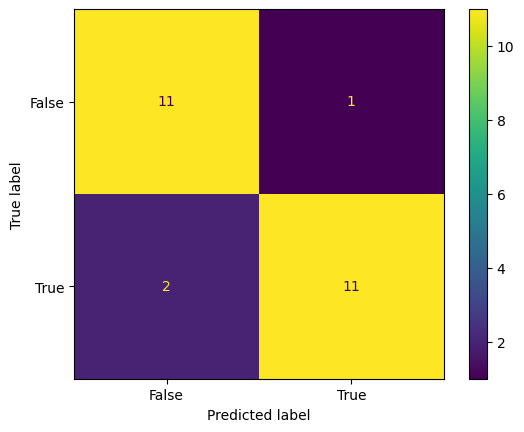

In [13]:
confusion_matrix = metrics.confusion_matrix(test_data['sarcasm'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['False', 'True'])

cm_display.plot()
plt.show()

In [14]:
print("Accuracy: %0.2f" % metrics.accuracy_score(test_data['sarcasm'], predictions))
print("Precision: %0.2f" % metrics.precision_score(test_data['sarcasm'], predictions))
print("Recall: %0.2f" % metrics.recall_score(test_data['sarcasm'], predictions))
print("F1 Score: %0.2f" % metrics.f1_score(test_data['sarcasm'], predictions))

Accuracy: 0.88
Precision: 0.92
Recall: 0.85
F1 Score: 0.88


## PyTorch Embeddings with Transformer and Attention

In [15]:
tokenizer = torchtext.data.utils.get_tokenizer("basic_english")

tokenized_sentences = []
tokens = []
max_tokens = 0
for sentence in sentences:
    tokenized_sentence = tokenizer(sentence)
    if (len(tokenized_sentence) > max_tokens):
        max_tokens = len(tokenized_sentence)
    tokenized_sentences.append(tokenized_sentence)
    for token in tokenized_sentence:
        if token not in tokens:
            tokens.append(token)
tokens.sort()

vocabulary = torchtext.vocab.build_vocab_from_iterator([tokens])
vocab_size = len(vocabulary)

In [16]:
# training parameters
MAX_LEN = max_tokens
NUM_WORDS = vocab_size
BATCH_SIZE = 1
EPOCHS = 100
LR = 0.00001

In [17]:
# bag of words
bag_of_words = []
for i in range(vocab_size):
    bag_of_words.append({vocabulary.lookup_token(i): 0})

for sentence in tokenized_sentences:
    for token in sentence:
        count = bag_of_words[vocabulary[token]][token]
        bag_of_words[vocabulary[token]][token] = count + 1

word_frequency = []
for k in bag_of_words:
    for key, value in k.items():
        word_frequency.append((key, value))
        
int_mapping = {}
for i in range(vocab_size):
    int_mapping[vocabulary.lookup_token(i)] = i # [value for key, value in bag_of_words[i].items()][0]

In [18]:
class NLPClassificationDataset(Dataset):
    def __init__(self, data, word_frequency, int_mapping, max_len):
        self.word_frequency = word_frequency
        self.int_mapping = int_mapping
        self.data = data
        self.max_len = max_len
    
    def return_int_vector(self, int_mapping, data_item):
        tokenized_sentence = tokenizer(data_item)
        int_vector = [
            int_mapping[word] for word in data_item \
            if word in int_mapping
        ]
        return int_vector
    
    def pad_features(self, int_vector, max_len):
        features = np.zeros((1, max_len), dtype = int)
        if len(int_vector) <= max_len:
            zeros = list(np.zeros(max_len - len(int_vector)))
            new = zeros + int_vector
        else:
            new = int_vector[: max_len]
        features = np.array(new)
        return features
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data_item = self.data.iloc[idx]
        int_vector = self.return_int_vector(self.int_mapping, data_item.text)
        padded_features = self.pad_features(int_vector, self.max_len)
        label = data_item.sarcasm
        return {
            'text': torch.tensor(padded_features, dtype=torch.int32),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [19]:
dataset_train = NLPClassificationDataset(
    train_data, word_frequency, int_mapping, MAX_LEN
)

dataset_test = NLPClassificationDataset(
    test_data, word_frequency, int_mapping, MAX_LEN
)

# dataset_valid = NLPClassificationDataset()
print(f"Number of training samples: {len(dataset_train)}")
print(f"Number of test samples: {len(dataset_test)}")

Number of training samples: 97
Number of test samples: 25


In [20]:
train_loader = DataLoader(
    dataset_train, 
    batch_size=BATCH_SIZE,
    shuffle=True, 
    num_workers=0
)

test_loader = DataLoader(
    dataset_test, 
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [21]:
def count_correct_incorrect(labels, outputs, train_running_correct):
    # As the outputs are currently logits.
    outputs = torch.sigmoid(outputs)
    running_correct = 0
    for i, label in enumerate(labels):
        if label < 0.5 and outputs[i] < 0.5:
            running_correct += 1
        elif label >= 0.5 and outputs[i] >= 0.5:
            running_correct += 1
    return running_correct

In [22]:
def train(model, trainloader, optimizer, criterion, device):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        inputs, labels = data['text'], data['label']
        inputs = inputs.to(device)
        labels = torch.tensor(labels, dtype=torch.float32).to(device)
        optimizer.zero_grad()
        
        # Forward pass.
        outputs = model(inputs)
        outputs = torch.squeeze(outputs, -1)
        
        # Calculate the loss.
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        running_correct = count_correct_incorrect(
            labels, outputs, train_running_correct
        )
        train_running_correct += running_correct
        
        # Backpropagation.
        loss.backward()
        
        # Update the optimizer parameters.
        optimizer.step()
    
    # Loss and accuracy for the complete epoch.
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc


def validate(model, testloader, criterion, device):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    predictions = []
    
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            inputs, labels = data['text'], data['label']
            inputs = inputs.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)
            
            # Forward pass
            outputs = model(inputs)
            outputs = torch.squeeze(outputs, -1)
            
            # record predictions
            predictions.append(1 if outputs >= 0.5 else 0)
            
            # Calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            running_correct = count_correct_incorrect(
                labels, outputs, valid_running_correct
            )
            valid_running_correct += running_correct
        
    # Loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc, predictions

In [23]:
EMBED_DIM = 256
NUM_ENCODER_LAYERS = 3
NUM_HEADS = 4

In [24]:
class EncoderClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_layers, num_heads):
        super(EncoderClassifier, self).__init__()
        self.emb = nn.Embedding(vocab_size, embed_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, 
            nhead=num_heads, 
            batch_first=True
        )
        self.encoder = nn.TransformerEncoder(
            encoder_layer=self.encoder_layer,
            num_layers=num_layers,
        )
        self.linear = nn.Linear(embed_dim, 1)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.emb(x)
        x = self.encoder(x)
        x = self.dropout(x)
        x = x.max(dim=1)[0]
        out = self.linear(x)
        return out   

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EncoderClassifier(
    NUM_WORDS+1, 
    embed_dim=EMBED_DIM,
    num_layers=NUM_ENCODER_LAYERS,
    num_heads=NUM_HEADS
).to(device)
print(model)

# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")

total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.\n")

EncoderClassifier(
  (emb): Embedding(342, 256)
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
    )
    (linear1): Linear(in_features=256, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=256, bias=True)
    (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inp

In [26]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(
    model.parameters(), 
    lr=LR,
)

In [27]:
# Lists to keep track of losses and accuracies.
train_loss = []
train_acc = []
least_loss = float('inf')

best_model = None

# training
for epoch in range(EPOCHS):
    print(f"[INFO]: Epoch {epoch+1} of {EPOCHS}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, optimizer, criterion, device)
    
    train_loss.append(train_epoch_loss)
    train_acc.append(train_epoch_acc)
    
    print(f"Training loss: {train_epoch_loss}, training acc: {train_epoch_acc}")
    
    # save model
    if train_epoch_loss < least_loss:
        least_loss = train_epoch_loss
        best_model = model
    print('-'*50)

[INFO]: Epoch 1 of 100
Training


  0%|                                                                                                                                 | 0/97 [00:00<?, ?it/s]/var/folders/_w/zdsqkbcd6cv24n91j1swt3kc0000gs/T/ipykernel_70249/3230079313.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.21it/s]


Training loss: 0.5795251544296127, training acc: 71.1340206185567
--------------------------------------------------
[INFO]: Epoch 2 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.10it/s]


Training loss: 0.43276647328562345, training acc: 84.5360824742268
--------------------------------------------------
[INFO]: Epoch 3 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.85it/s]


Training loss: 0.3675212698614167, training acc: 86.5979381443299
--------------------------------------------------
[INFO]: Epoch 4 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 31.02it/s]


Training loss: 0.3225618337194637, training acc: 88.65979381443299
--------------------------------------------------
[INFO]: Epoch 5 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.67it/s]


Training loss: 0.2700738716755331, training acc: 91.75257731958763
--------------------------------------------------
[INFO]: Epoch 6 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.78it/s]


Training loss: 0.2289846925852225, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 7 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.57it/s]


Training loss: 0.2153933511605275, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 8 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.71it/s]


Training loss: 0.1904588961810565, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 9 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.43it/s]


Training loss: 0.17478348587918066, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 10 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.69it/s]


Training loss: 0.1669174722856698, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 11 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.10it/s]


Training loss: 0.164717286877987, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 12 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.68it/s]


Training loss: 0.15113553133092283, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 13 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.87it/s]


Training loss: 0.16158280529552282, training acc: 93.81443298969072
--------------------------------------------------
[INFO]: Epoch 14 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.61it/s]


Training loss: 0.14531602344677313, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 15 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.30it/s]


Training loss: 0.14500585141874964, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 16 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.34it/s]


Training loss: 0.12324371404727422, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 17 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.82it/s]


Training loss: 0.14163433773846357, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 18 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.43it/s]


Training loss: 0.13425766836165345, training acc: 95.87628865979381
--------------------------------------------------
[INFO]: Epoch 19 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.38it/s]


Training loss: 0.11965654340822288, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 20 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.08it/s]


Training loss: 0.11879745523172873, training acc: 95.87628865979381
--------------------------------------------------
[INFO]: Epoch 21 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.91it/s]


Training loss: 0.12964388251559059, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 22 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.82it/s]


Training loss: 0.10698078237786006, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 23 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.69it/s]


Training loss: 0.10601767379197667, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 24 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.93it/s]


Training loss: 0.10923235356680493, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 25 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.80it/s]


Training loss: 0.10471044603966839, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 26 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.82it/s]


Training loss: 0.11715794274656668, training acc: 95.87628865979381
--------------------------------------------------
[INFO]: Epoch 27 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.58it/s]


Training loss: 0.11276576698658095, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 28 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.09it/s]


Training loss: 0.11153735048029591, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 29 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.05it/s]


Training loss: 0.10348833383651469, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 30 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.59it/s]


Training loss: 0.09439297353779205, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 31 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.45it/s]


Training loss: 0.09474999109761953, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 32 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 27.96it/s]


Training loss: 0.09570337366477764, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 33 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 27.63it/s]


Training loss: 0.09067170662366181, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 34 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.37it/s]


Training loss: 0.09071416933065192, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 35 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.57it/s]


Training loss: 0.09120629091156628, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 36 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.56it/s]


Training loss: 0.08331892063232743, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 37 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.59it/s]


Training loss: 0.08621528278481211, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 38 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.77it/s]


Training loss: 0.07889220448941131, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 39 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.07it/s]


Training loss: 0.10546207530592021, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 40 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 27.60it/s]


Training loss: 0.08044129021196643, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 41 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 26.91it/s]


Training loss: 0.08391478510538102, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 42 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.53it/s]


Training loss: 0.08057056370862764, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 43 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 27.92it/s]


Training loss: 0.08430189005316466, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 44 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.75it/s]


Training loss: 0.08048252131341063, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 45 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.49it/s]


Training loss: 0.07190066470525146, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 46 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.07it/s]


Training loss: 0.07165798884258394, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 47 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.14it/s]


Training loss: 0.07368712782547461, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 48 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.72it/s]


Training loss: 0.07127983600801918, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 49 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.19it/s]


Training loss: 0.06757818711250985, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 50 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.62it/s]


Training loss: 0.06455891292664336, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 51 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.33it/s]


Training loss: 0.06858996763410162, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 52 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.08it/s]


Training loss: 0.07492049916513258, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 53 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.58it/s]


Training loss: 0.07560574408714658, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 54 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.65it/s]


Training loss: 0.0680042223719227, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 55 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 25.40it/s]


Training loss: 0.0626037521501577, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 56 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.44it/s]


Training loss: 0.06123952761260353, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 57 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.79it/s]


Training loss: 0.06569976968419668, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 58 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.15it/s]


Training loss: 0.06755868889718165, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 59 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.84it/s]


Training loss: 0.06708941229402457, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 60 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.12it/s]


Training loss: 0.0660701938222232, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 61 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.55it/s]


Training loss: 0.06989314163050593, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 62 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.03it/s]


Training loss: 0.059181383934328646, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 63 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 31.02it/s]


Training loss: 0.0667137308618172, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 64 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.14it/s]


Training loss: 0.057995989518156085, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 65 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 26.75it/s]


Training loss: 0.06877284197436949, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 66 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.26it/s]


Training loss: 0.06472813949664304, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 67 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.48it/s]


Training loss: 0.06835586758412675, training acc: 95.87628865979381
--------------------------------------------------
[INFO]: Epoch 68 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.71it/s]


Training loss: 0.11025977524448385, training acc: 94.84536082474226
--------------------------------------------------
[INFO]: Epoch 69 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.49it/s]


Training loss: 0.06475417458437432, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 70 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.91it/s]


Training loss: 0.061849467333812164, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 71 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.92it/s]


Training loss: 0.051704043323363445, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 72 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.56it/s]


Training loss: 0.055511197459710865, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 73 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.80it/s]


Training loss: 0.06843020736740767, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 74 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.36it/s]


Training loss: 0.055558194327945266, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 75 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.49it/s]


Training loss: 0.05975440169914719, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 76 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.92it/s]


Training loss: 0.058608429974032636, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 77 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.82it/s]


Training loss: 0.04826344814043211, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 78 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 31.57it/s]


Training loss: 0.051225736300618815, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 79 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.91it/s]


Training loss: 0.05442384689905742, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 80 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.00it/s]


Training loss: 0.045933447732431416, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 81 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.37it/s]


Training loss: 0.0319027347319469, training acc: 98.96907216494846
--------------------------------------------------
[INFO]: Epoch 82 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.85it/s]


Training loss: 0.046300878662973964, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 83 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.79it/s]


Training loss: 0.044243180367142414, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 84 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.92it/s]


Training loss: 0.045269408290082115, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 85 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.29it/s]


Training loss: 0.046318476077506124, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 86 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.37it/s]


Training loss: 0.04966474182328591, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 87 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.72it/s]


Training loss: 0.04730215187508705, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 88 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.31it/s]


Training loss: 0.04817534269022872, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 89 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.71it/s]


Training loss: 0.04875595857893788, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 90 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.17it/s]


Training loss: 0.038420242025635744, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 91 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.26it/s]


Training loss: 0.0354470594234935, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 92 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.02it/s]


Training loss: 0.04128891103417905, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 93 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 28.96it/s]


Training loss: 0.04419419627841298, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 94 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.96it/s]


Training loss: 0.04218719820023908, training acc: 98.96907216494846
--------------------------------------------------
[INFO]: Epoch 95 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.49it/s]


Training loss: 0.03856193384764111, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 96 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.76it/s]


Training loss: 0.046079565613440863, training acc: 96.90721649484536
--------------------------------------------------
[INFO]: Epoch 97 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.71it/s]


Training loss: 0.04770686615802802, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 98 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.60it/s]


Training loss: 0.030178506241896948, training acc: 97.9381443298969
--------------------------------------------------
[INFO]: Epoch 99 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 30.42it/s]


Training loss: 0.04454380227845419, training acc: 98.96907216494846
--------------------------------------------------
[INFO]: Epoch 100 of 100
Training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:03<00:00, 29.03it/s]

Training loss: 0.030224808735773566, training acc: 98.96907216494846
--------------------------------------------------


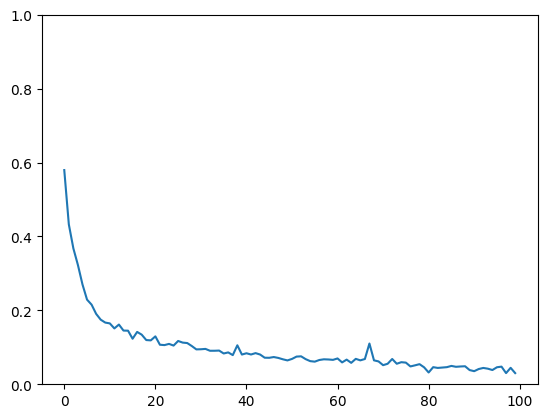

In [28]:
plt.ylim(0, 1)
plt.plot(train_loss)

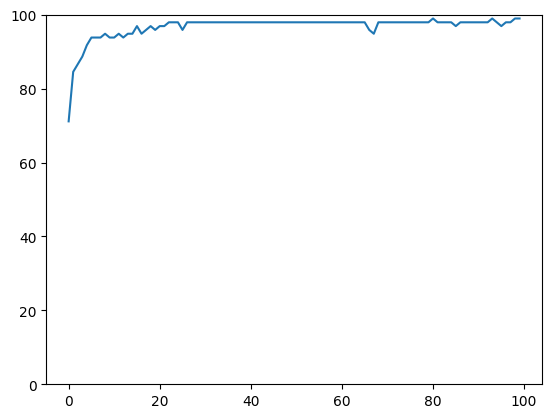

In [29]:
plt.ylim(0, 100)
plt.plot(train_acc)

In [30]:
%%time
test_loss, test_acc, predictions = validate(
    best_model, 
    test_loader,  
    criterion, 
    device
)
print(f"Test loss: {test_loss}, test acc: {test_acc}")

Validation


  0%|                                                                                                                                 | 0/25 [00:00<?, ?it/s]/var/folders/_w/zdsqkbcd6cv24n91j1swt3kc0000gs/T/ipykernel_70249/3230079313.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 188.08it/s]

Test loss: 1.0848722116902354, test acc: 80.0
CPU times: user 133 ms, sys: 17.1 ms, total: 150 ms
Wall time: 136 ms


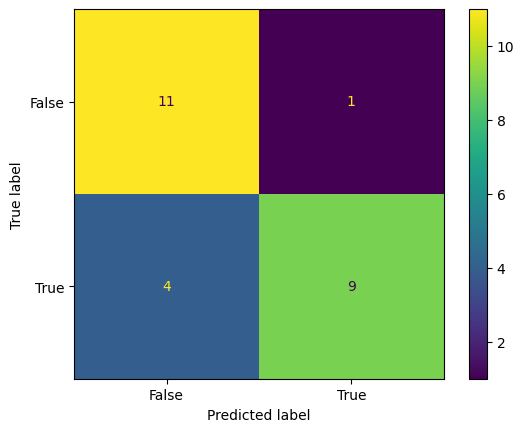

In [31]:
confusion_matrix = metrics.confusion_matrix(test_data['sarcasm'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['False', 'True'])

cm_display.plot()
plt.show()

In [32]:
print("Accuracy: %0.2f" % metrics.accuracy_score(test_data['sarcasm'], predictions))
print("Precision: %0.2f" % metrics.precision_score(test_data['sarcasm'], predictions))
print("Recall: %0.2f" % metrics.recall_score(test_data['sarcasm'], predictions))
print("F1 Score: %0.2f" % metrics.f1_score(test_data['sarcasm'], predictions))

Accuracy: 0.80
Precision: 0.90
Recall: 0.69
F1 Score: 0.78
